In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import scipy as sp
import pandas as pd
import csv
import random as rn
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import scipy.io as sio
import math

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer

In [2]:
cancer_data = load_breast_cancer()

In [3]:
df_cancer = pd.DataFrame(np.c_[cancer_data['data'], cancer_data['target']], columns = np.append(cancer_data['feature_names'], ['target']))
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


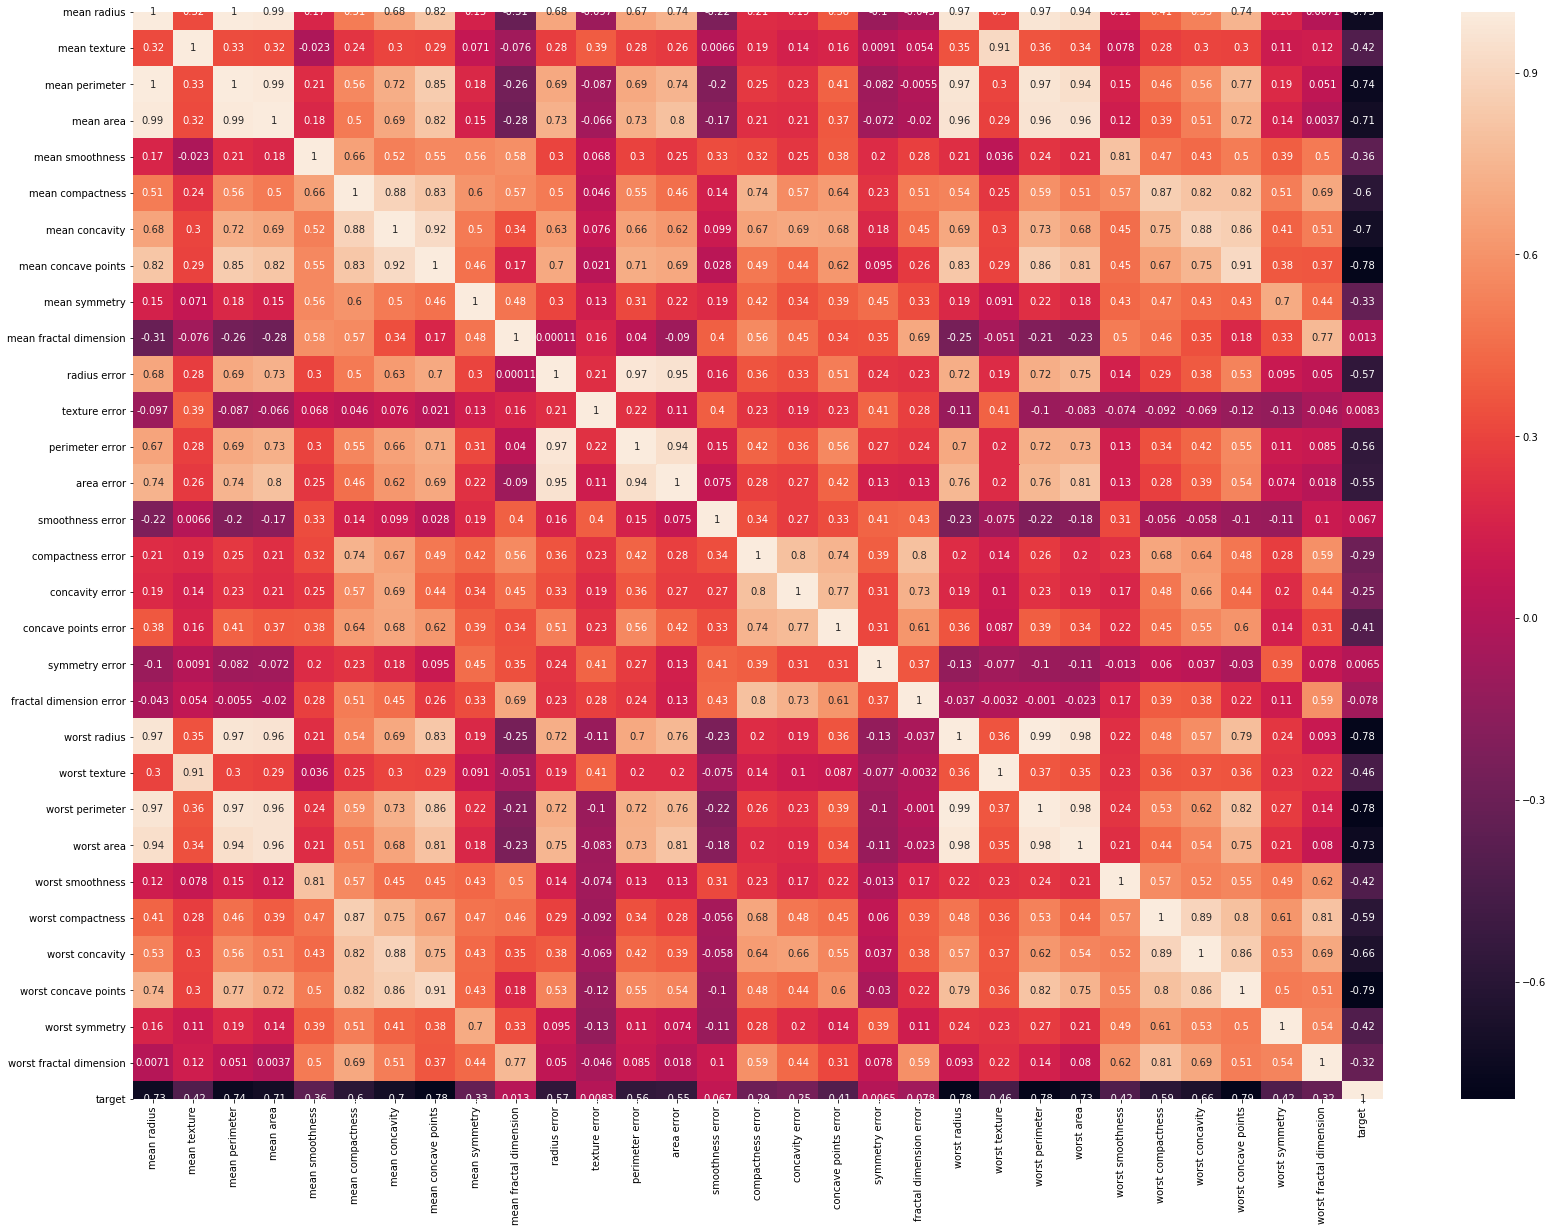

In [4]:
plt.figure(figsize=(28,20)) 
sns.heatmap(df_cancer.corr(), annot=True)

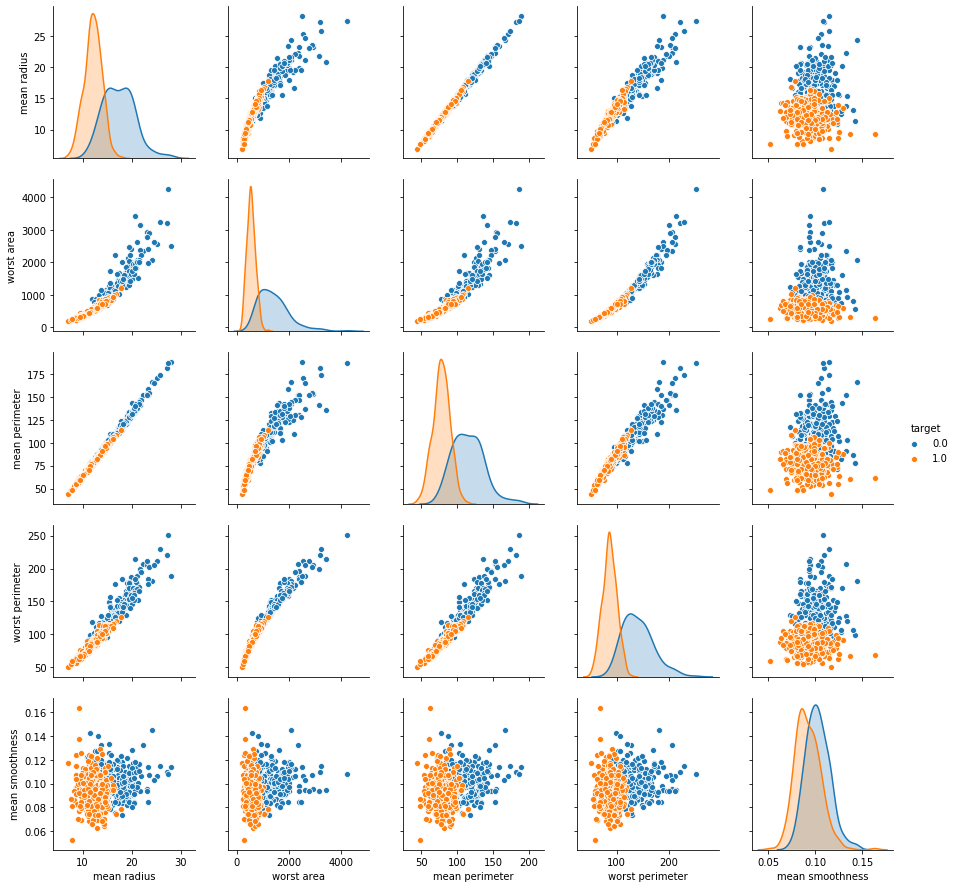

In [5]:
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'worst area', 'mean perimeter', 'worst perimeter','mean smoothness'] )

In [6]:
X = df_cancer.drop(['target'], axis = 1)
Y = df_cancer['target']

## Partition 1 (20/80 Split)

### SVM

In [7]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size = 0.8 ,random_state = 42)

In [8]:
# Calculate error given feature vectors X and labels Y.
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X)   
    e = 1 - accuracy_score(Y, Y_pred) 
    return e

In [9]:
C_list = [0.1, 1, 10, 100, 1000]
opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.

for C in C_list:
    # Create a linear SVM classifier.
    classifier = svm.LinearSVC(penalty='l2', loss='hinge', C=C, max_iter=10000)
    
    # Use the classifier to fit the training set (use X_train, Y_train).
    classifier.fit(X_train_val, Y_train_val)

    # Obtain the weights and bias from the linear SVM classifier.
    W = classifier.coef_[0]
    b = classifier.intercept_[0]
    
    # Show decision boundary, training error and test error.
    print('C = {}'.format(C))
    print('Decision boundary: {:.3f}x0+{:.3f}x1+{:.3f}=0'.format(W[0],W[1],b))
    #vis(X_train_val, Y_train_val, W, b)
    e_training = calc_error(X_train_val, Y_train_val, classifier)
    print('Training accuracy: {}'.format(1 - e_training))
    print('\n\n\n')
    
    # Judge if it is the optimal one.
    if e_training < opt_e_training:
        opt_e_training = e_training
        opt_classifier = classifier
        opt_C = C

C = 0.1
Decision boundary: 0.071x0+0.048x1+0.012=0
Training accuracy: 0.8672566371681416




C = 1
Decision boundary: 0.071x0+0.050x1+0.012=0
Training accuracy: 0.911504424778761




C = 10
Decision boundary: 0.071x0+0.050x1+0.012=0
Training accuracy: 0.8849557522123894




C = 100
Decision boundary: 0.070x0+0.049x1+0.012=0
Training accuracy: 0.6902654867256637




C = 1000
Decision boundary: 0.071x0+0.051x1+0.012=0
Training accuracy: 0.911504424778761






In [10]:
# Obtain the weights and bias from the best linear SVM classifier.
opt_W = opt_classifier.coef_[0]
opt_b = opt_classifier.intercept_[0]
print('Best parameter C* = {}'.format(opt_C))
print('Decision boundary: {:.3f}x0+{:.3f}x1+{:.3f}=0'.format(opt_W[0],opt_W[1],opt_b))
#vis(X_test, Y_test, opt_W, opt_b)
print('Testing Accuracy: {}'.format(1 - calc_error(X_test, Y_test, opt_classifier)))

Best parameter C* = 1
Decision boundary: 0.071x0+0.050x1+0.012=0
Testing Accuracy: 0.868421052631579


### Logistic Regression

In [11]:
classifier = LogisticRegressionCV()
param = [
  {'penalty': ['l1'], 'solver': ['liblinear']},
  {'penalty': ['l2'], 'solver': ['newton-cg']},
 ]
logit = GridSearchCV(classifier, param, cv=5, return_train_score=True)
logit.fit(X_train_val, Y_train_val)
logit_train = logit.cv_results_['mean_train_score']
logit_test = logit.cv_results_['mean_test_score']

test_accX = logit.best_estimator_.predict(X_test) == Y_test
print('Best parameter: {}'.format(logit.best_params_))
#print(sum(test_accX))
test_acc = sum(test_accX)/len(test_accX)
print('Training accuracy: {}'.format(logit_train))
print('Validation score: {}'.format(logit_test))
print('Testining accuracy: {}'.format(test_acc))

/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameter: {'penalty': 'l2', 'solver': 'newton-cg'}
Training accuracy: [0.96491228 0.91595543]
Validation score: [0.89380531 0.91150442]
Testining accuracy: 0.9385964912280702


### Random Forest

In [12]:
param = {"max_features":[0.05,0.1,0.2,0.3,0.4,0.6,0.8,1],"n_estimators":[1024]}
classifier = RandomForestClassifier()

rf = GridSearchCV(classifier,param,cv=5, return_train_score=True)
rf.fit(X_train_val, Y_train_val)
rf_train = rf.cv_results_['mean_train_score']
rf_test = rf.cv_results_['mean_test_score']

test_accX = rf.best_estimator_.predict(X_test) == Y_test

#print(sum(test_accX))
test_acc = sum(test_accX)/len(test_accX)
print('Best parameter: {}'.format(rf.best_params_))
print('Training accuracy: {}'.format(rf_train))
print('Validation score: {}'.format(rf_test))
print('Testining accuracy: {}'.format(test_acc))

/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameter: {'max_features': 0.05, 'n_estimators': 1024}
Training accuracy: [1. 1. 1. 1. 1. 1. 1. 1.]
Validation score: [0.92035398 0.92035398 0.92035398 0.92035398 0.92035398 0.91150442
 0.91150442 0.92035398]
Testining accuracy: 0.9517543859649122


### Decision Tree

In [13]:
param  = {"criterion":["entropy"],'max_depth':[1,2,3,4,5]}
classifier = DecisionTreeClassifier()

dt = GridSearchCV(classifier,param,cv=5, return_train_score=True)
dt.fit(X_train_val, Y_train_val)
dt_train = dt.cv_results_['mean_train_score']
dt_test = dt.cv_results_['mean_test_score']

test_accX = dt.best_estimator_.predict(X_test) == Y_test
#print(sum(test_accX))
test_acc = sum(test_accX)/len(test_accX)
print('Best parameter: {}'.format(dt.best_params_))
print('Training accuracy: {}'.format(dt_train))
print('Validation score: {}'.format(dt_test))
print('Testining accuracy: {}'.format(test_acc))

Best parameter: {'criterion': 'entropy', 'max_depth': 1}
Training accuracy: [0.95151731 0.96917971 0.99122807 0.99561404 1.        ]
Validation score: [0.91150442 0.90265487 0.88495575 0.88495575 0.88495575]
Testining accuracy: 0.9078947368421053


/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
